## BOUNDING BOX
-> Compute (x, y, z) means

-> Get the covariance matrix, which expresses the degree of variance around each mean with respect to a point set

-> Compute the eigenvector, eigenvalue of the covariance matrix

-> Eigenvectors represent the principal direction of data spread. The eigenvector associated with the largest eigenvalue points in the direction of greatest variance in the data set

-> Center the dataset around the centroid ... WHY IS THIS NEEDED? 

-> Rotate the points in the dataset to align with the eigenvector

-> Compute the absolute value of the max and mins to draw the oriented bounding box

-> Unrotate the bounding box back to the regular coordinate system

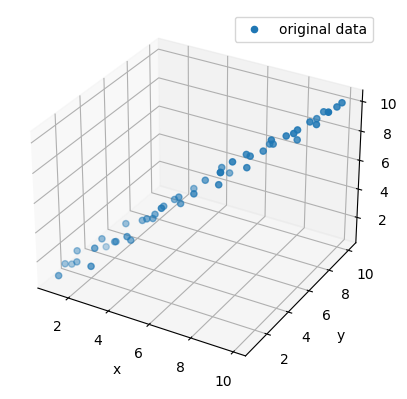

In [3]:
# %matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as LA
from mpl_toolkits.mplot3d import Axes3D

"""

"""
# generate random points, add noise to dataset
y = np.linspace(1, 10, 50) + np.random.normal(0, 0.2, 50)
z = np.linspace(1, 10, 50) + np.random.normal(0, 0.2, 50)
x = np.linspace(1, 10, 50) + np.random.normal(0, 0.2, 50)
data = np.vstack([x, y, z])

# plot pointset
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[0,:], data[1,:], data[2,:], label="original data")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()

In [13]:
means = np.mean(data, axis=1)
# Covariance represents the degree of clustering around the mean in each axis
covariance_matrix = np.cov(data)
# eigenvectors point to the principal direction in the data spread in each direction
eigenvalues, eigenvectors = LA.eig(covariance_matrix)

print(np.rad2deg(np.arccos(np.dot(eigenvectors[:,0], eigenvectors[:,1]))))
print(np.rad2deg(np.arccos(np.dot(eigenvectors[:,2], eigenvectors[:,0]))))
print(np.rad2deg(np.arccos(np.dot(eigenvectors[:,1], eigenvectors[:,2]))))

90.0
90.00000000000001
89.99999999999253


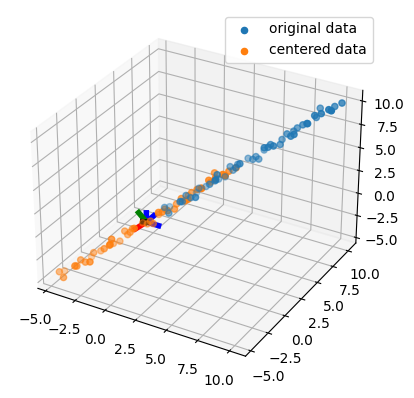

In [22]:
# The eigenvectors are at the cartesian origin, meaning we need to move the point cloud to be centered around the origin to be useful
# We do this by subtracting the means from each value. This aligns the centroid of the dataset to the cartesian origin
centered_data = data - means[:,np.newaxis]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[0,:], data[1,:], data[2,:], label="original data")
ax.scatter(centered_data[0,:], centered_data[1,:], centered_data[2,:], label="centered data")
ax.legend()

# cartesian basis
ax.plot([0, 1],  [0, 0], [0, 0], color='b', linewidth=4)
ax.plot([0, 0],  [0, 1], [0, 0], color='b', linewidth=4)
ax.plot([0, 0],  [0, 0], [0, 1], color='b', linewidth=4)
# eigen basis
ax.plot([0, eigenvectors[0, 0]],  [0, eigenvectors[1, 0]], [0, eigenvectors[2, 0]], color='r', linewidth=4)
ax.plot([0, eigenvectors[0, 1]],  [0, eigenvectors[1, 1]], [0, eigenvectors[2, 1]], color='g', linewidth=4)
ax.plot([0, eigenvectors[0, 2]],  [0, eigenvectors[1, 2]], [0, eigenvectors[2, 2]], color='k', linewidth=4)

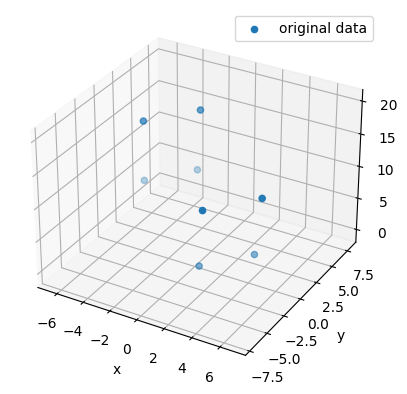

In [10]:
# TEST CASE Bounding box points
bb_points = np.array([[4.1949637777057571, -6.9916062961762613, 16.047420986034020], 
             [6.8206194998754439, -4.0247156045330703, 16.598321750671875], 
             [-0.48443183668373879, 1.7688355092261352, 20.213704228708519], 
             [-3.1100875588534249, -1.1980551824170558, 19.662803464070663], 
             [3.4299717028501773, 2.0579830217101063, -6.6613381477509392e-16], 
             [-3.8750796337090048, 7.8515341354693104, 3.6153824780366430], 
             [-6.5007353558786898, 4.8846434438261213, 3.0644817133987878], 
             [0.80431598068049104, -0.90890766993308547, -0.55090076463785609]])

# plot pointset
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bb_points[:,0], bb_points[:,1], bb_points[:,2], label="original data")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()